## The SIR model

The SIR model of epidemiology partitions the population into three compartments: susceptibles, S, who can catch the disease; infectives, I, who have already caught the disease and infect susceptibles; and recovered individuals, R. Since the disease is assumed not to be fatal, the sum $N=S+I+R$ remains constant. The rate at which the susceptibles get infected is 
$$
\lambda(t) = \frac{\beta I}{N}
$$
where the parameter $\beta$ is the probability of infection on contact. The infected individuals recover from the disease at a rate $\gamma$. Then, the ordinary differential equations of the SIR model are

\begin{align}
\dot S &= -\lambda(t)S \\
\dot I &= \lambda(t)I - \gamma I \\
\dot R &= \gamma I 
\end{align}



------------------------------------------------------------------------------------------------------------------------------

#### After creating/cloning a new environment, with all the dependencies, either using conda or from ArcGIS Pro. 
#### (As per the instructions in the Readme.md)
#### Proceed with this notebook.

------------------------------------------------------------------------------------------------------------------------------

**Model B: single lockdown ver. 2.0 with SEIR Model**

---

* Checking Env.

In [ ]:
#forked from Rajesh Singh's work, related to Pyross Lib.
import sys
sys.executable

---

* Importing all req. libraries.

In [1]:
%matplotlib inline                  
import numpy as np
import pyross
import matplotlib.pyplot as plt     # optional for notebook visualization.

---

* Loading & defining model parameters:

In [2]:
M = 1                  # the SIR model has no age structure
Ni = 100000*np.ones(M)   # so there is only one age group, 100000 is the total population 
N = np.sum(Ni)         # and the total population is the size of this age group

beta  = 0.2            # infection rate 
gIa   = 0.1            # recovery rate of asymptomatic infectives 
gIs   = 0.1            # recovery rate of symptomatic infectives 
alpha = 0           
fsa   = 1              # the self-isolation parameter 


#initial condition

Ia0 = np.array([0])     
Is0 = np.array([1]) 
R0  = np.array([0])     # and assume there are no recovered individuals initially 
S0  = N-(Ia0+Is0+R0)    # so that the initial susceptibles are obtained from S + Ia + Is + R = N

---

* Running the Model & Creating Model file

In [3]:
C= np.identity(M)

# there is no contact structure
def contactMatrix(t):   
    return  C       


# duration of simulation
Tf = 200;  Nt=200; 

#input data, inside model
parameters = {'alpha':alpha, 'beta':beta, 'gIa':gIa, 'gIs':gIs,'fsa':fsa}
model = pyross.models.SIR(parameters, M, Ni)

# simulate model 
data = model.simulate(S0, Ia0, Is0, contactMatrix, Tf, Nt)

---

* Visualization

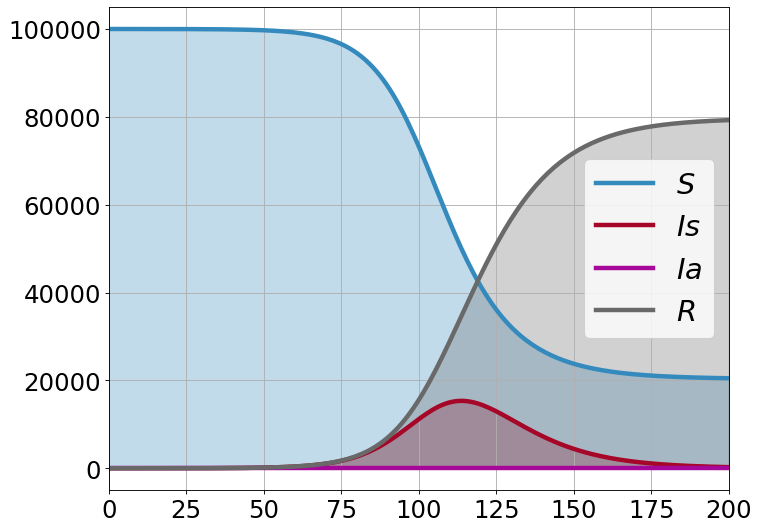

In [4]:
# plot the data and obtain the epidemic curve
S  = data['X'][:,0].flatten()
Ia = data['X'][:,1].flatten()
Is = data['X'][:,2].flatten()
t = data['t']


fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

#suspected
plt.fill_between(t, 0, S, color="#348ABD", alpha=0.3)
plt.plot(t, S, '-', color="#348ABD", label='$S$', lw=4)

#symptomatic
plt.fill_between(t, 0, Is, color='#A60628', alpha=0.3)
plt.plot(t, Is, '-', color='#A60628', label='$Is$', lw=4)

#asymptomatic
plt.fill_between(t, 0, Ia, color='#A60999', alpha=0.3)
plt.plot(t, Ia, '-', color='#A60999', label='$Ia$', lw=4)

#recovered/removed
R=N-S-Ia-Is; plt.fill_between(t, 0, R, color="dimgrey", alpha=0.3)
plt.plot(t, R, '-', color="dimgrey", label='$R$', lw=4)

plt.legend(fontsize=26); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)

---

---

---